<a href="https://colab.research.google.com/github/sm0602/MLnow_GirlScript/blob/main/MultivariateLinearaRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/LiveCodeSession/02_EDA/student'

/content/drive/MyDrive/LiveCodeSession/02_EDA/student


In [4]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os 

In [7]:
mathData = pd.read_csv('student-mat.csv', sep=';')

In [8]:
mathData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


##Data Processing

In [9]:
print(f'school: {mathData.school.unique()}')
print(f'sex: {mathData.sex.unique()}')
print(f'address: {mathData.address.unique()}')
print(f'Mjob: {mathData.Mjob.unique()}')
print(f'Fjob: {mathData.Fjob.unique()}')
print(f'higher: {mathData.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [10]:
#categorical to numeric vakue conversion

#binary valued
mathData['school'] = mathData['school'].apply({'GP':1, 'MS':0}.get)
mathData['sex'] = mathData['sex'].apply({'F':1, 'M':0}.get)
mathData['address'] = mathData['address'].apply({'U':1, 'R':0}.get)
mathData['higher'] = mathData['higher'].apply({'yes':1, 'no':0}.get)

#multi valued
mathData['Mjob'] = mathData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
mathData['Fjob'] = mathData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

mathData.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,1,no,no,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,1,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,LE3,T,1,1,1,3,other,mother,1,2,3,yes,no,yes,no,yes,1,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,yes,yes,yes,1,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,yes,no,yes,1,no,no,4,3,2,1,2,5,4,6,10,10
5,1,0,16,1,LE3,T,4,3,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,4,2,1,2,5,10,15,15,15
6,1,0,16,1,LE3,T,2,2,3,3,home,mother,1,2,0,no,no,no,no,yes,1,yes,no,4,4,4,1,1,3,0,12,12,11
7,1,1,17,1,GT3,A,4,4,3,5,home,mother,2,2,0,yes,yes,no,no,yes,1,no,no,4,1,4,1,1,1,6,6,5,6
8,1,0,15,1,LE3,A,3,2,4,3,home,mother,1,2,0,no,yes,yes,no,yes,1,yes,no,4,2,2,1,1,1,0,16,18,19
9,1,0,15,1,GT3,T,3,4,3,3,home,mother,1,2,0,no,yes,yes,yes,yes,1,yes,no,5,5,1,1,1,5,0,14,15,15


In [11]:
#consider the below columns from the DataFrame

mathData = mathData[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]

In [12]:
mathData.head(10)

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,1,1,1,1,5,1,3,2,6,5,6,6
1,1,1,1,1,3,1,3,2,4,5,5,6
2,1,1,1,1,3,1,3,2,10,7,8,10
3,1,1,1,2,4,1,2,3,2,15,14,15
4,1,1,1,3,3,1,3,2,4,6,10,10
5,1,0,1,4,3,1,4,2,10,15,15,15
6,1,0,1,3,3,1,4,2,0,12,12,11
7,1,1,1,3,5,1,1,2,6,6,5,6
8,1,0,1,4,3,1,2,2,0,16,18,19
9,1,0,1,3,3,1,5,2,0,14,15,15


In [13]:
mathData.to_csv('cleanedMathData.csv') #export the mathData as cleanedMathData as csv file

In [14]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv


##Data Visualization

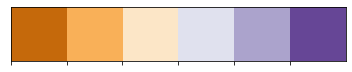

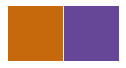

In [15]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [16]:
mathData.columns #columns in the dataframe

Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

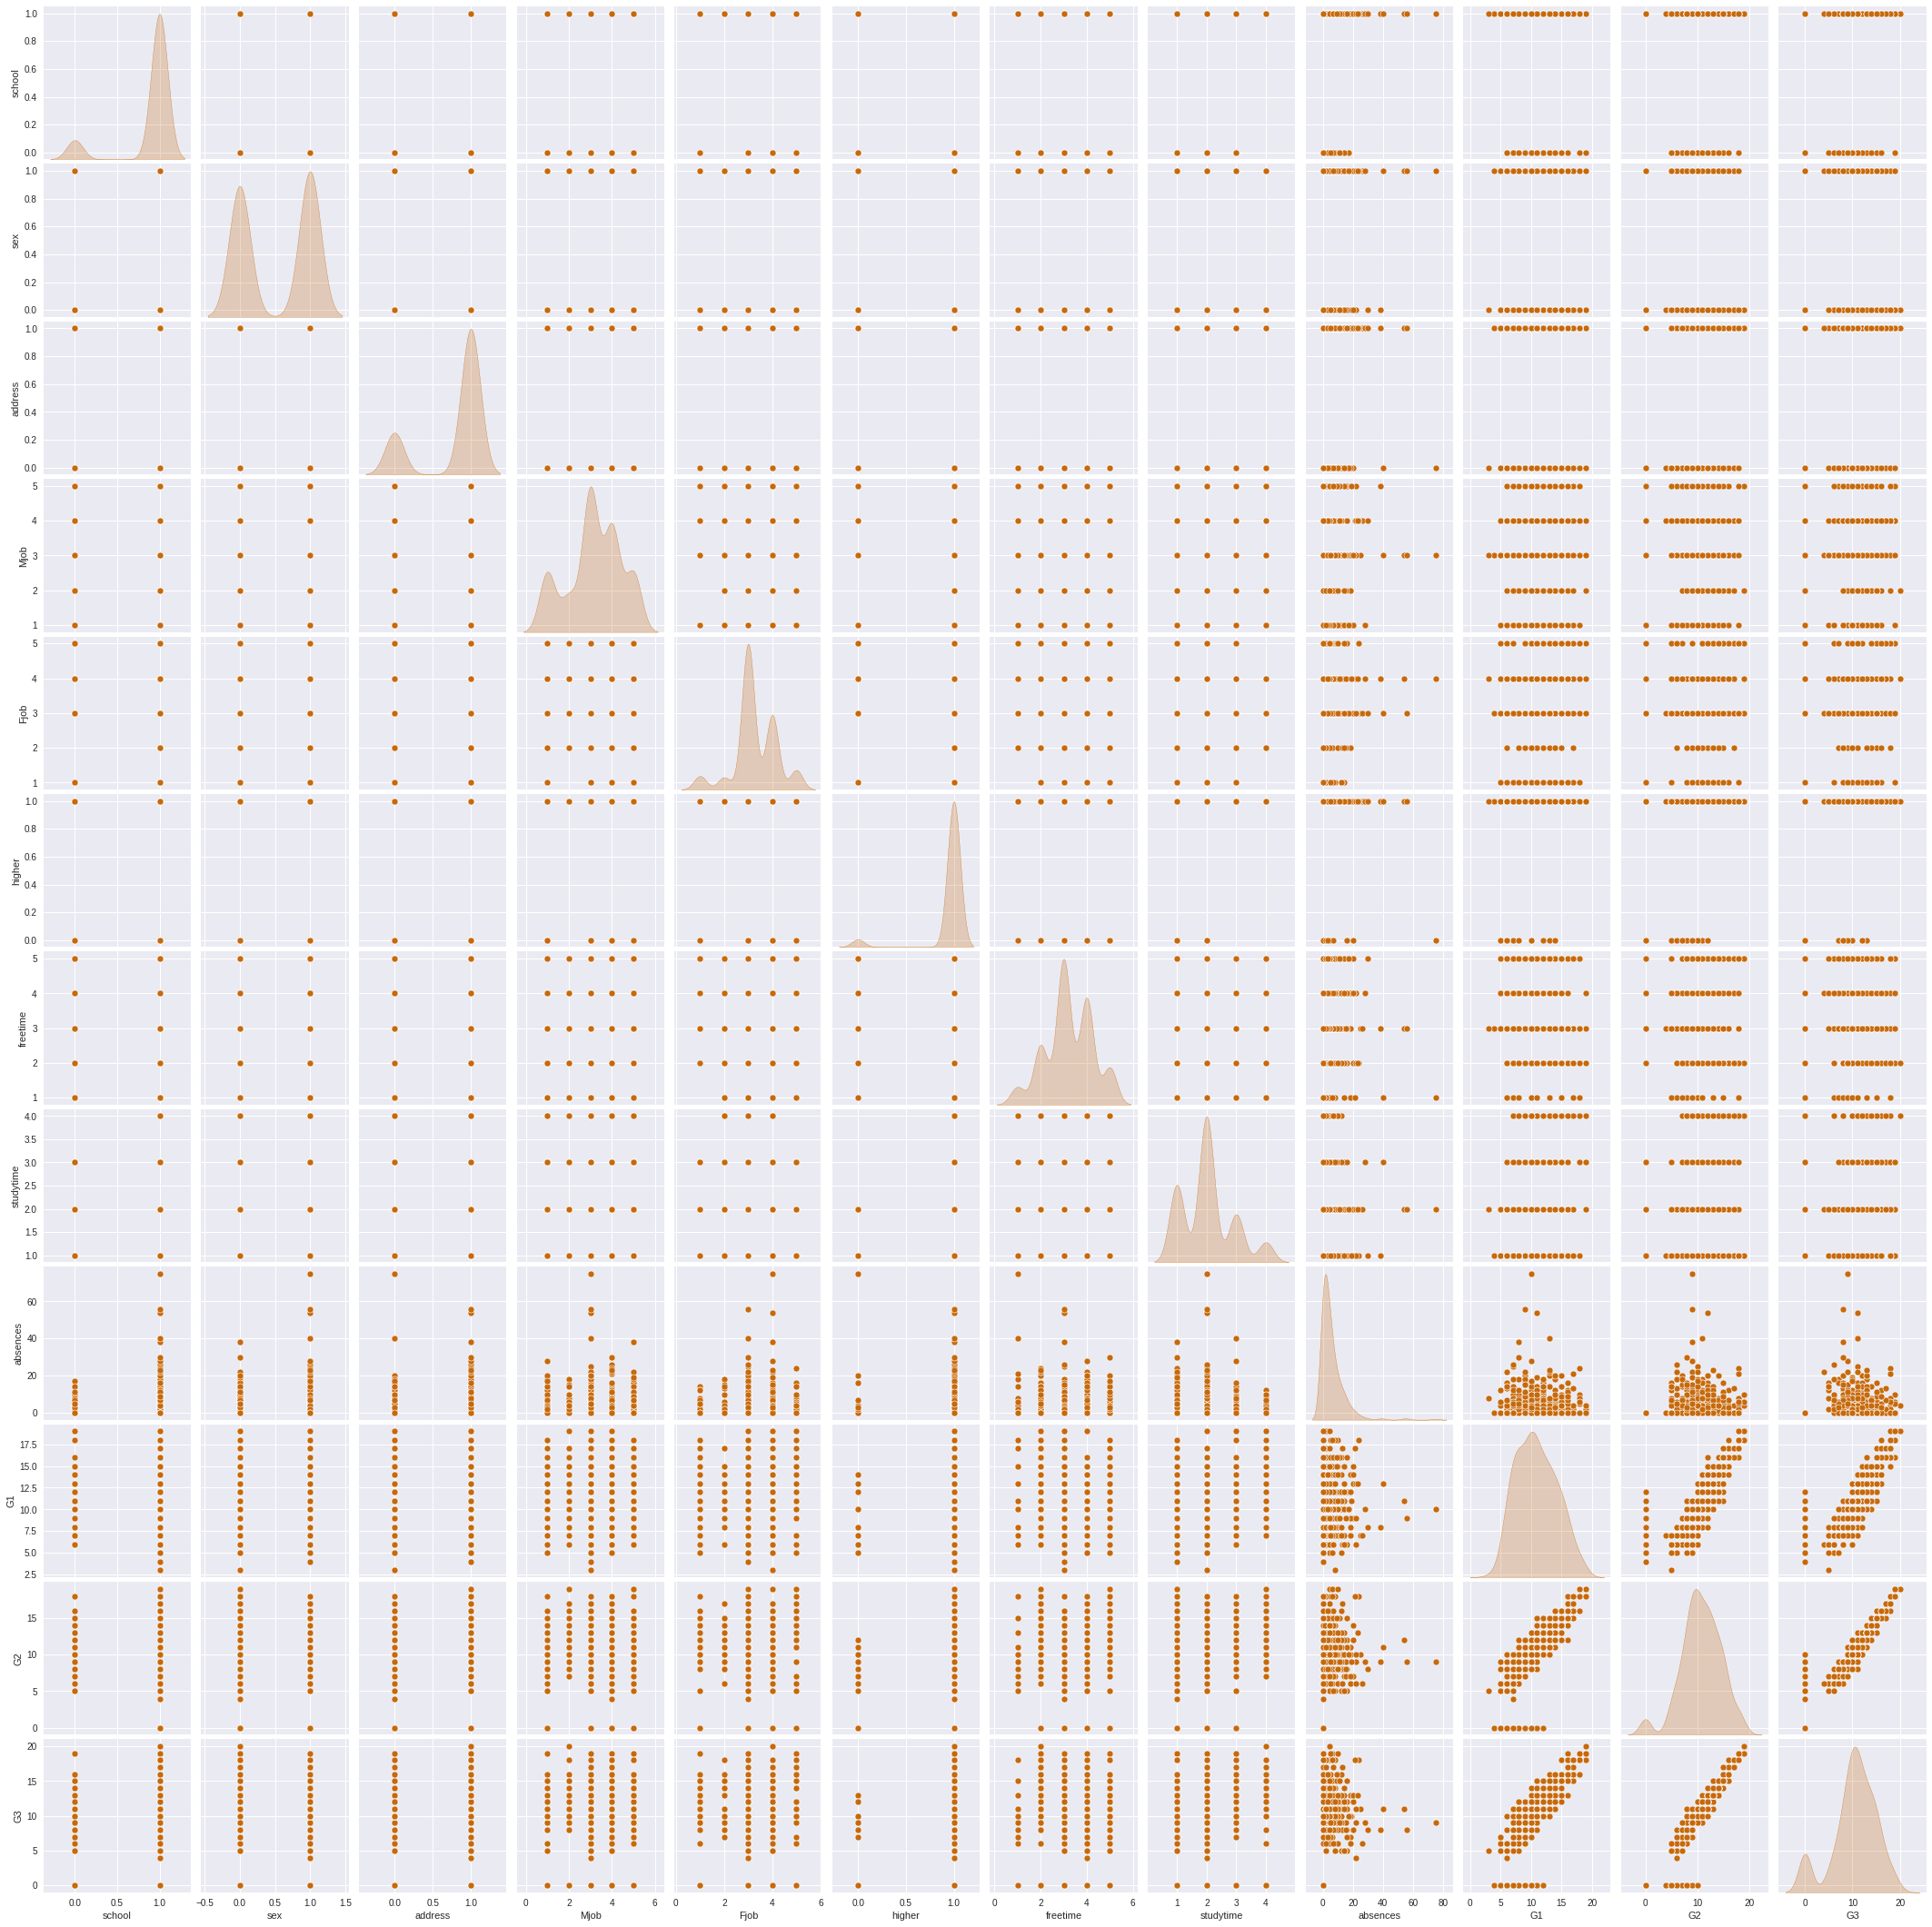

In [17]:
#pairplot for all the values

sns.pairplot(mathData,
             x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
             y_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
       diag_kind='kde'
             )

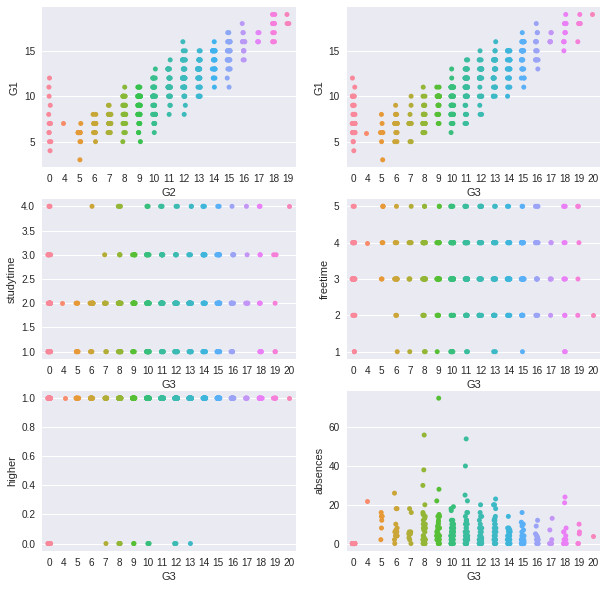

In [18]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='G1', x='G2', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=mathData, hue=None, ax=axarr[0][1])
sns.stripplot(y='studytime', x='G3', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=mathData, hue=None,  ax=axarr[1][1])
sns.stripplot(y='higher', x='G3', data=mathData, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=mathData, hue=None, ax=axarr[2][1])

##Data Splits

In [19]:
#80-20 train-test percent split

trainDataset = mathData.sample(frac=0.8, random_state=0) 
testDataset = mathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        0     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    0        1     4     3  ...          2         4  11  11  11
31       1    0        1     4     4  ...          2         0  17  16  17
32       1    0        0     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [20]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 12)
(79, 12)


In [21]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        0     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    0        1     4     3  ...          2         4  11  11  11
31       1    0        1     4     4  ...          2         0  17  16  17
32       1    0        0     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [22]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [23]:
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
329       1    1        1     5     5  ...         3          3         4  14  14
318       1    1        0     1     4  ...         3          3         0  11  11
317       1    1        1     3     3  ...         3          3         9   9  10
65        1    1        1     5     4  ...         4          2         2  16  15
59        1    1        1     4     3  ...         2          2         2  15  16

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
9        1    0        1     3     3  ...         5          2         0  14  15
25       1    1        1     4     4  ...         2          1        14   6   9
28       1    0        1     4     3  ...         3          2         4  11  11
31       1    0        1     4     4  ...         3          2         0  17  16
32       1    0        0     5     1  ...         5          2         0  17  16

##Model Development

In [25]:
print(len(trainFeatures.columns))

11


In [24]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

8


In [31]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=inputNeurons, activation='relu'), #input layer
                             tf.keras.layers.Dense(units=2*inputNeurons, activation='relu'), #single hidden layer
                             tf.keras.layers.Dense(1) #output layer
])

In [43]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss= 'mean_absolute_error',
    metrics=['mae','mse']
)

In [49]:
numEpochs = 2200
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs = numEpochs)

Epoch 1/2200
10/10 [==============================] - 0s 8ms/step - loss: 0.6976 - mae: 0.6976 - mse: 1.9729 - val_loss: 0.8902 - val_mae: 0.8902 - val_mse: 2.0144
Epoch 2/2200
10/10 [==============================] - 0s 3ms/step - loss: 0.6982 - mae: 0.6982 - mse: 1.9435 - val_loss: 0.9030 - val_mae: 0.9030 - val_mse: 2.1038
Epoch 3/2200
10/10 [==============================] - 0s 3ms/step - loss: 0.7156 - mae: 0.7156 - mse: 1.9773 - val_loss: 0.9174 - val_mae: 0.9174 - val_mse: 2.0061
Epoch 4/2200
10/10 [==============================] - 0s 3ms/step - loss: 0.6945 - mae: 0.6945 - mse: 1.9319 - val_loss: 0.8883 - val_mae: 0.8883 - val_mse: 2.0710
Epoch 5/2200
10/10 [==============================] - 0s 3ms/step - loss: 0.7103 - mae: 0.7103 - mse: 2.0043 - val_loss: 0.9417 - val_mae: 0.9417 - val_mse: 2.2271
Epoch 6/2200
10/10 [==============================] - 0s 3ms/step - loss: 0.7151 - mae: 0.7151 - mse: 1.9852 - val_loss: 0.9009 - val_mae: 0.9009 - val_mse: 2.0373
Epoch 7/2200
10/

##Result Analysis

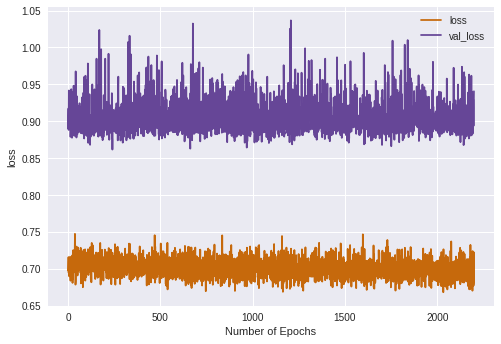

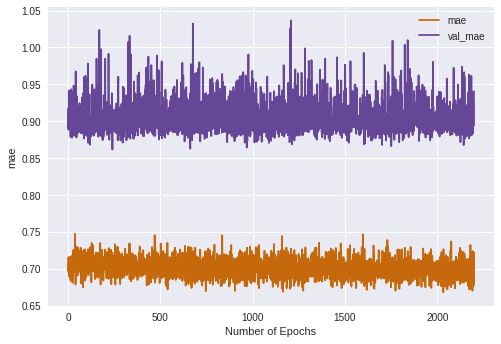

In [50]:
#Plot Functions

def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [51]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[15.374058    8.543465   11.696963   17.23667    16.5848     12.286343
 12.849757   19.593561   20.565441   10.785759   15.355028   14.633465
  4.0905504   6.5813007  10.498624   14.786701   10.227809   17.646498
  7.4295936  10.773696   16.044746   14.147187   13.4032545  15.360955
  4.8496623   1.3520492   1.0559376  10.204481   13.548073    9.540984
 11.328206   11.4656725  11.580279    5.85002     8.274409   11.982117
  8.163129    8.870337   15.470601    9.070395   10.151793    5.76554
 11.965122    0.09869759 11.908203   -0.9232717   9.201694   11.739152
 11.713733   17.194218   11.807262   14.1374855  11.238907   10.686697
 14.844632   11.267801   15.688915   12.590006   14.570865   10.232669
 14.954711    6.09126    16.421352    6.561387   15.746829   12.7731695
 15.385409   15.177056    7.941206    8.952596   12.384972   19.134245
 11.990617   15.750134   10.412146    3.069821   10.687833    7.1422553
 12.772986  ]


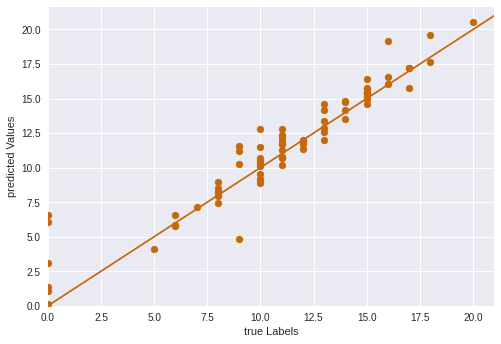

In [52]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

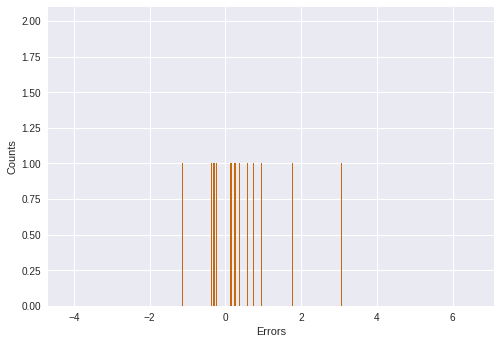

In [53]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

##Saving Models 

In [54]:
modelName = f'model_01.h5'
model.save(f'{os.getcwd()}/{modelName}')

In [55]:
model = tf.keras.models.load_model(f'{os.getcwd()}/{modelName}')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
